Submission 2 - Belajar Pengembangan Machine Learning Dicoding

Menggunakan dataset delhi weather data yang diunduh melalui Kaggle pada melalui link https://www.kaggle.com/mahirkukreja/delhi-weather-data 

In [1]:
# Mengambil data melalui google drive
# Dengan melakukan autentikasi akun

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls '/content/drive/My Drive/Dataset Latihan Pengembang ML'

bbc-news-data.csv  citrus.csv  Iris.csv  testset.csv


In [22]:
# Import library pandas
# df singkatan dari dataframe

import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Dataset Latihan Pengembang ML/testset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [23]:
# Mengetahui ukuran data dengan shape
# Terdiri dari (baris, kolom)

df.shape # Dataset terdiri dari 100990 baris data dan 20 kolom atribut

(100990, 20)

In [24]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [25]:
# Mengecek nilai kosong / nol pada dataset

df.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [26]:
# Melakukab preprocessing data
# Mengubah data tanggal dari string menjadi data datetime

df['datetime_utc']=pd.to_datetime(df['datetime_utc'])
df['datetime_utc'].head()

# Normalisasi data yang melebihi 50C karena tidak relevan
import numpy as np

median = df.loc[df[' _tempm'] < 55, ' _tempm'].median()
df.loc[df[' _tempm'] > 55, ' _tempm'] = np.nan
df.fillna(median,inplace=True)

# Mengisi nilai no dengan nilai rata-rata dari data
df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)
df = df[['datetime_utc',' _tempm' ]]

In [27]:
df.head()

,datetime_utc,_tempm
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0


In [28]:
# Melakukan resample untuk kolom datetime

df['datetime'] = df['datetime_utc']
df_datetime = df
df_datetime = df[['datetime_utc', 'datetime']]
df_datetime = df_datetime.set_index('datetime_utc')
df_datetime.head(10)
df_datetime = df_datetime['datetime'].resample('H').ffill()
df_datetime.head(10)

datetime_utc
1996-11-01 11:00:00   1996-11-01 11:00:00
1996-11-01 12:00:00   1996-11-01 12:00:00
1996-11-01 13:00:00   1996-11-01 13:00:00
1996-11-01 14:00:00   1996-11-01 14:00:00
1996-11-01 15:00:00   1996-11-01 14:00:00
1996-11-01 16:00:00   1996-11-01 16:00:00
1996-11-01 17:00:00   1996-11-01 17:00:00
1996-11-01 18:00:00   1996-11-01 18:00:00
1996-11-01 19:00:00   1996-11-01 19:00:00
1996-11-01 20:00:00   1996-11-01 20:00:00
Freq: H, Name: datetime, dtype: datetime64[ns]

In [11]:
# Mengubah kolom datetime menjadi index pada data

df_tempm = df.set_index('datetime_utc')
df_tempm.head()

,_tempm
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


In [12]:
# Data temperature setelah dilakukan resample() untuk per jam

df_tempm = df_tempm[' _tempm'].resample('H').ffill()
df_tempm.head(10)

datetime_utc
1996-11-01 11:00:00    30.0
1996-11-01 12:00:00    28.0
1996-11-01 13:00:00    24.0
1996-11-01 14:00:00    24.0
1996-11-01 15:00:00    24.0
1996-11-01 16:00:00    23.0
1996-11-01 17:00:00    21.0
1996-11-01 18:00:00    21.0
1996-11-01 19:00:00    21.0
1996-11-01 20:00:00    19.0
Freq: H, Name:  _tempm, dtype: float64

In [30]:
# Dataset Temperature di kota Delhi setelah dilakukan preprocessing

df = pd.concat([df_datetime, df_tempm], axis = 1)
df.head(10)

,datetime,_tempm
datetime_utc,,
1996-11-01 11:00:00,1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,1996-11-01 14:00:00,24.0
1996-11-01 15:00:00,1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,1996-11-01 16:00:00,23.0
1996-11-01 17:00:00,1996-11-01 17:00:00,21.0
1996-11-01 18:00:00,1996-11-01 18:00:00,21.0
1996-11-01 19:00:00,1996-11-01 19:00:00,21.0


In [40]:
# Ukuran dataset temperatur kota Delhi yang sudah dilakukan preprocessing

df.shape

(179504, 2)

In [33]:
# df = df.set_index([pd.Index([1..179504])])
# df.head(10)

In [35]:
# Membuat nilai untuk memisahkan antara data tanggal dan data temperatur

tanggal = df['datetime'].values
tempt  = df[' _tempm'].values

In [36]:
# Import library untuk mengelola model dan visualisasi

from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.ops.gen_dataset_ops import dataset_to_graph
from sklearn.model_selection import train_test_split

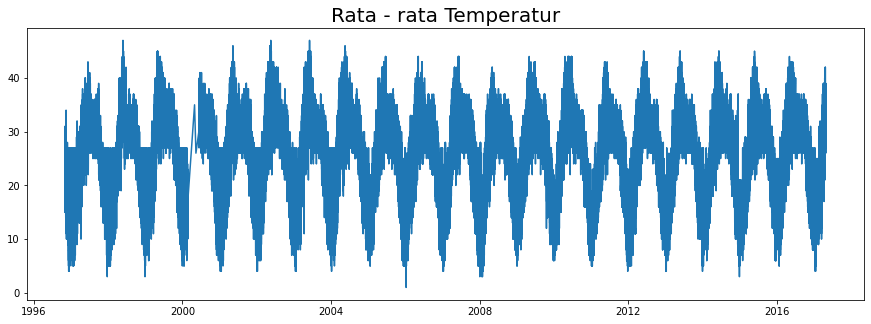

In [37]:
# Visualisasi Nilai rata - rata temperatur

plt.figure(figsize=(15,5))
plt.plot(tanggal, tempt)
plt.title('Rata - rata Temperatur',
          fontsize=20);

In [41]:
# Fungsi untuk mengatur nilai batch size

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [42]:
# Memisahkan data untuk latih dan uji menggunakan train_test_split

x_latih, x_uji, y_latih, y_uji = train_test_split(tempt, tanggal, test_size = 0.2, random_state = 0 , shuffle=False)
print(len(x_latih), len(x_uji))

143603 35901


In [43]:
train_set = windowed_dataset(x_latih, window_size=60, batch_size=100, shuffle_buffer=4000)
test_set = windowed_dataset(x_uji, window_size=60, batch_size=100, shuffle_buffer=4000)

In [44]:
# Build Model Machine Learning untuk Time Series

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400),
])

In [45]:
# Untuk mengetahui ketentuan MAE maka didasarkan pada rentang data, seperti berikut
# z = (data_max - data_min)*0.1, variabel yang digunakan untuk membandingkan diumpamakan 'z'

data_max = df[' _tempm'].max()
print('Nilai maksimal : ' )
print(data_max)

data_min = df[' _tempm'].min()
print('\nNilai minimal : ' )
print(data_min)

Nilai maksimal : 
47.0

Nilai minimal : 
1.0


In [46]:
# Data nilai perbandingan untuk mengetahui nilai MAE < 10%

z = ((data_max - data_min) * 0.1)
print('Nilai perbandingan MAE : ')
print(z)

Nilai perbandingan MAE : 
4.6000000000000005


Dengan kata lain nilai MAE yang dimaksud harus dibawah 8.9 tersebut.

In [47]:
# Fungsi Callback untuk menghentikan training model pada 85%

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< 10.0):
      self.model.stop_training = True
      print("\nMAE daripada model < 10% dari skala data")
callbacks = myCallback()

In [48]:
# Atur learning rate
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Atur parameter optimizer
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

# Model Compile
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [49]:
# Membuar variabel history untuk dapat divisualisasikan

history = model.fit(train_set, epochs=100, validation_data= test_set, callbacks=[callbacks])

Epoch 1/100
1436/1436 [==============================] - 214s 145ms/step - loss: 14.7034 - mae: 15.1708 - val_loss: 1.9614 - val_mae: 2.4125
Epoch 2/100
1436/1436 [==============================] - ETA: 0s - loss: 1.9852 - mae: 2.4360
MAE daripada model < 10% dari skala data
1436/1436 [==============================] - 263s 182ms/step - loss: 1.9852 - mae: 2.4360 - val_loss: 1.8326 - val_mae: 2.2811


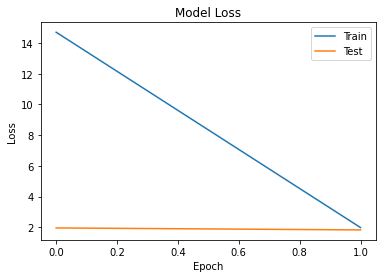

In [50]:
# Visualisasi Plot Loss Model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

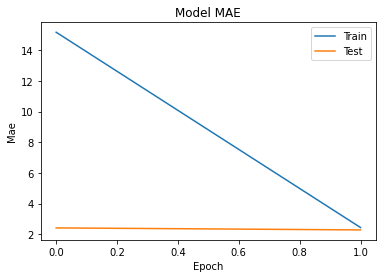

In [51]:
# Visualisasi Plot MAE Model

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()